In [1]:
import acquire1
import prepare1
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import scipy as sp 
import os
from env import host, user, password
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from scipy import stats
import seaborn as sns


df = prepare1.zillow_prep()
df.head(10)

,id,parcelid,bathrooms,bedrooms,calculatedbathnbr,regionidcounty,zip_code,squarefootage,fips,fullbathcnt,lotsizesquarefeet,propertylandusedesc,transactiondate,taxamount,taxablevalue
0,2061546,11289917,2.0,3.0,2.0,3101.0,97318.0,1458.0,6037.0,2.0,8284.0,Single Family Residential,2017-06-23,2319.90,136104.0
1,1834372,11705026,1.0,2.0,1.0,3101.0,96018.0,1421.0,6037.0,1.0,6707.0,Single Family Residential,2017-06-30,543.69,35606.0
2,1923117,14269464,3.0,4.0,3.0,1286.0,96958.0,2541.0,6059.0,3.0,4975.0,Single Family Residential,2017-06-01,9819.72,880456.0
3,2121349,11389003,2.0,3.0,2.0,3101.0,96037.0,1650.0,6037.0,2.0,7300.0,Single Family Residential,2017-06-01,7673.19,614000.0
4,2093710,11967869,1.0,2.0,1.0,3101.0,96023.0,693.0,6037.0,1.0,2908.0,Single Family Residential,2017-06-29,3267.47,274237.0
6,2964522,14236060,2.0,3.0,2.0,1286.0,97064.0,1668.0,6059.0,2.0,6774.0,Single Family Residential,2017-05-19,2376.34,196483.0
7,1175489,14365030,2.5,3.0,2.5,1286.0,96989.0,1653.0,6059.0,2.0,3090.0,Single Family Residential,2017-05-01,6185.28,605000.0
8,950579,14008322,1.0,3.0,1.0,1286.0,97048.0,879.0,6059.0,1.0,6000.0,Single Family Residential,2017-05-18,2015.78,141875.0
9,570983,11552513,2.0,3.0,2.0,3101.0,96047.0,1108.0,6037.0,2.0,6050.0,Single Family Residential,2017-05-17,5990.50,486866.0
10,1857557,12535098,2.0,3.0,2.0,3101.0,96246.0,1947.0,6037.0,2.0,6404.0,Single Family Residential,2017-05-11,4784.07,388478.0


In [2]:
df = df.replace({6037:'LA_county',
                6059: 'Orange_county',
                6111: 'Ventura_county'})

df['tax_rate'] = df.taxamount / df.taxablevalue * 100
df['county'] = df.fips

In [3]:
df.drop(columns=['id','parcelid','calculatedbathnbr','fullbathcnt',
                 'propertylandusedesc','transactiondate','fips'], inplace=True)


In [4]:
lac_taxrate = df[df.county == 'LA_county'].tax_rate
oc_taxrate = df[df.county == 'Orange_county'].tax_rate
vc_taxrate = df[df.county == 'Ventura_county'].tax_rate

print('LA County','\n',lac_taxrate.describe(),'\n')
print('Orange County','\n',oc_taxrate.describe(),'\n')
print('Ventura County','\n',vc_taxrate.describe())

LA County 
 count    9519.000000
mean        1.412997
std         0.753049
min         0.107132
25%         1.212074
50%         1.263390
75%         1.436654
max        45.288365
Name: tax_rate, dtype: float64 

Orange County 
 count    4043.000000
mean        1.211077
std         0.322500
min         0.171235
25%         1.060488
50%         1.151609
75%         1.251689
max        10.735031
Name: tax_rate, dtype: float64 

Ventura County 
 count    1287.000000
mean        1.205610
std         0.830085
min         0.078687
25%         1.074142
50%         1.125348
75%         1.192502
max        29.486491
Name: tax_rate, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

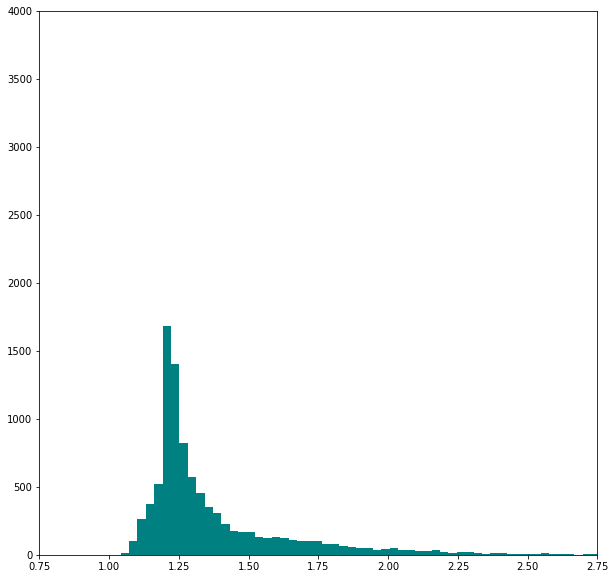

In [5]:
plt.figure(figsize=(10,10))
plt.hist(lac_taxrate, bins = 1500, color = 'teal')
plt.xlim(.75,2.75)
plt.ylim(0,4000)
plt.show

In [6]:
#sns.set()
#sns.set_context('talk')
#sns.set_style('darkgrid')
#grid = sns.FacetGrid(df, col='county', hue='tax_rate' ,size=3.2, aspect=2)
#grid.map(sns.kdeplot, 'tax_rate', shade=True)
#grid.add_legend()
#plt.show()

(0, 4)

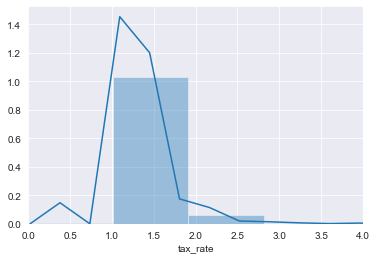

In [7]:
sns.set_style('darkgrid')
sns.distplot(lac_taxrate)
plt.xlim(0,4)

In [8]:
lac_taxrate.head()

0    1.704505
1    1.526962
3    1.249705
4    1.191477
9    1.230421
Name: tax_rate, dtype: float64

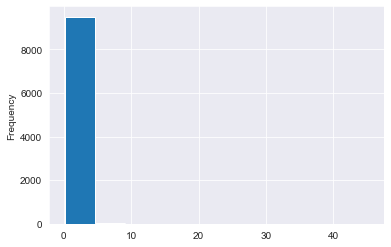

In [9]:
fig, ax = plt.subplots(figsize = (6,4))
lac_taxrate.plot(kind = "hist")
plt.show()


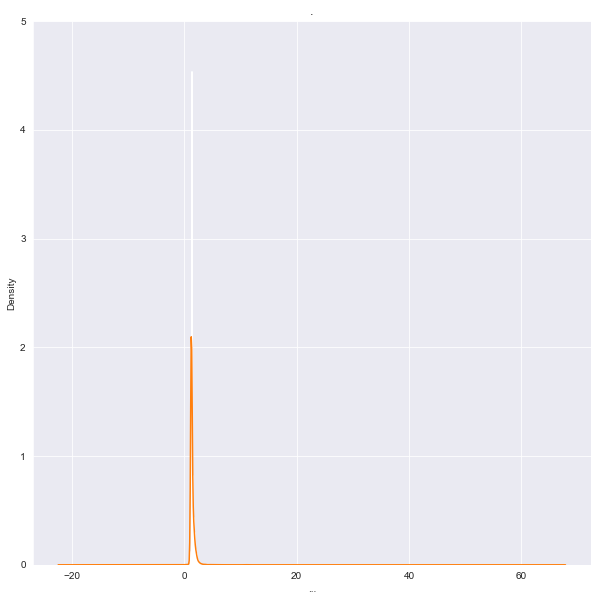

In [10]:

fig, ax = plt.subplots(figsize = (10,10))

# Plots #
    # Plot histogram
lac_taxrate.plot(kind = "hist", density = True, bins = 500) 
    # Plot KDE
lac_taxrate.plot(kind = "kde")

# X #
ax.set_xlabel("...")

# Y #
ax.set_ylim(0, 5)

# Overall #
ax.set_title(".")

plt.show()

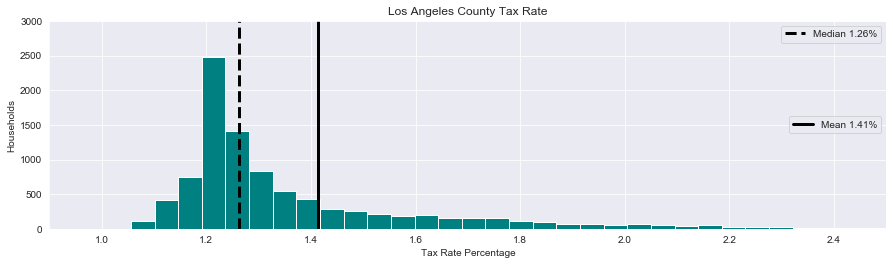

In [11]:

plt.figure(figsize=(15,13))
plt.subplot(3,1,1)
plt.hist(lac_taxrate, bins = 1000, color = 'teal')
plt.xlim(0.9, 2.5)
plt.ylim(0, 3000)
plt.title('Los Angeles County Tax Rate')
plt.ylabel('Households')
plt.xlabel('Tax Rate Percentage')

line1 = plt.axvline(lac_taxrate.median(),color='k',linewidth=3,linestyle='--')
line2 = plt.axvline(lac_taxrate.mean(),color='k',linewidth=3)

#first_legend = plt.legend(handles=['line1','line2'], loc='upper right')

#ax = plt.gca().add_artist(first_legend)

#plt.legend(handles=[line2], loc='upper right')
#p1, = plot([1,2,3], label="test1")
#p2, = plot([3,2,1], label="test2")

l1 = legend([line1], ["Median 1.26%"], loc=1)
l2 = legend([line2], ["Mean 1.41%"], loc='right')
gca().add_artist(l1) 

plt.show()

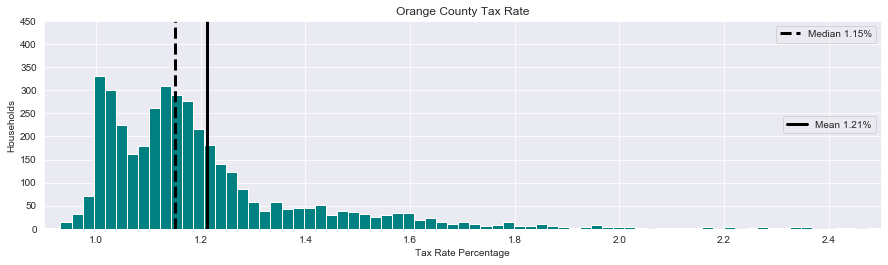

In [12]:
plt.figure(figsize=(15,13))
plt.subplot(3,1,1)
plt.hist(oc_taxrate, bins = 500, color = 'teal')
plt.xlim(0.9, 2.5)
plt.ylim(0, 450)
plt.title('Orange County Tax Rate')
plt.ylabel('Households')
plt.xlabel('Tax Rate Percentage')

line1 = plt.axvline(oc_taxrate.median(),color='k',linewidth=3,linestyle='--')
line2 = plt.axvline(oc_taxrate.mean(),color='k',linewidth=3)

#first_legend = plt.legend(handles=['line1','line2'], loc='upper right')

#ax = plt.gca().add_artist(first_legend)

#plt.legend(handles=[line2], loc='upper right')
#p1, = plot([1,2,3], label="test1")
#p2, = plot([3,2,1], label="test2")

l1 = legend([line1], ["Median 1.15%"], loc=1)
l2 = legend([line2], ["Mean 1.21%"], loc='right')
gca().add_artist(l1) 

plt.show()

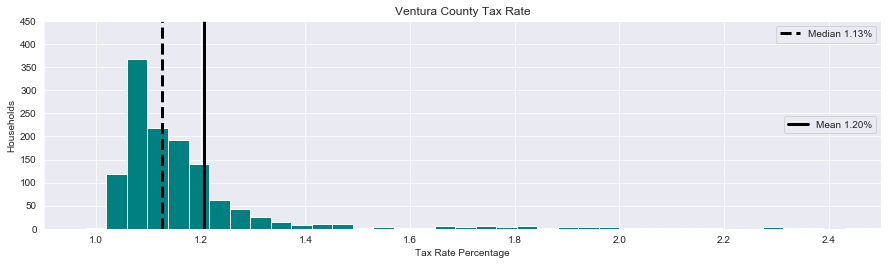

In [13]:
plt.figure(figsize=(15,13))
plt.subplot(3,1,1)
plt.hist(vc_taxrate, bins = 750, color = 'teal')
plt.xlim(0.9, 2.5)
plt.ylim(0, 450)
plt.title('Ventura County Tax Rate')
plt.ylabel('Households')
plt.xlabel('Tax Rate Percentage')

line1 = plt.axvline(vc_taxrate.median(),color='k',linewidth=3,linestyle='--')
line2 = plt.axvline(vc_taxrate.mean(),color='k',linewidth=3)

#first_legend = plt.legend(handles=['line1','line2'], loc='upper right')

#ax = plt.gca().add_artist(first_legend)

#plt.legend(handles=[line2], loc='upper right')
#p1, = plot([1,2,3], label="test1")
#p2, = plot([3,2,1], label="test2")

l1 = legend([line1], ["Median 1.13%"], loc=1)
l2 = legend([line2], ["Mean 1.20%"], loc='right')
gca().add_artist(l1) 

plt.show()

In [14]:
df.head()


,bathrooms,bedrooms,regionidcounty,zip_code,squarefootage,lotsizesquarefeet,taxamount,taxablevalue,tax_rate,county
0,2.0,3.0,3101.0,97318.0,1458.0,8284,2319.90,136104.0,1.704505,LA_county
1,1.0,2.0,3101.0,96018.0,1421.0,6707,543.69,35606.0,1.526962,LA_county
2,3.0,4.0,1286.0,96958.0,2541.0,4975,9819.72,880456.0,1.115299,Orange_county
3,2.0,3.0,3101.0,96037.0,1650.0,7300,7673.19,614000.0,1.249705,LA_county
4,1.0,2.0,3101.0,96023.0,693.0,2908,3267.47,274237.0,1.191477,LA_county


In [15]:
df['priceft'] = df.taxablevalue / df.squarefootage
df.head()

,bathrooms,bedrooms,regionidcounty,zip_code,squarefootage,lotsizesquarefeet,taxamount,taxablevalue,tax_rate,county,priceft
0,2.0,3.0,3101.0,97318.0,1458.0,8284,2319.90,136104.0,1.704505,LA_county,93.349794
1,1.0,2.0,3101.0,96018.0,1421.0,6707,543.69,35606.0,1.526962,LA_county,25.057002
2,3.0,4.0,1286.0,96958.0,2541.0,4975,9819.72,880456.0,1.115299,Orange_county,346.499803
3,2.0,3.0,3101.0,96037.0,1650.0,7300,7673.19,614000.0,1.249705,LA_county,372.121212
4,1.0,2.0,3101.0,96023.0,693.0,2908,3267.47,274237.0,1.191477,LA_county,395.724387


In [16]:
lac_price = df[df.county == 'LA_county'].priceft
oc_price = df[df.county == 'Orange_county'].priceft
vc_price = df[df.county == 'Ventura_county'].priceft

In [17]:
print('LA County','\n',lac_price.describe(),'\n')
print('Orange County','\n',oc_price.describe(),'\n')
print('Ventura County','\n',vc_price.describe())

LA County 
 count    9519.000000
mean      261.189093
std       239.216132
min        13.356354
25%       106.242573
50%       212.727477
75%       335.787166
max      5435.534565
Name: priceft, dtype: float64 

Orange County 
 count    4043.000000
mean      275.368515
std       189.490175
min        17.569541
25%       167.303581
50%       263.586207
75%       347.921537
max      3084.026133
Name: priceft, dtype: float64 

Ventura County 
 count    1287.000000
mean      238.646474
std       110.209942
min        28.851220
25%       166.888263
50%       242.454231
75%       302.798280
max       823.864118
Name: priceft, dtype: float64
